***
## Assumptions of the Model

- Regression residuals must be normally distributed.
- A linear relationship is assumed between the dependent variable and the independent variables.
- The residuals are homoscedastic and approximately rectangular-shaped.
- Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
- No Autocorrelation of the residuals.

***
## Import our Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [3]:
# load the data and replace the '..' with nan
econ_data = pd.read_excel('italy_economic_data.xlsx')
econ_data = econ_data.replace('..','nan')

In [5]:
# set the index to the year column
econ_data = econ_data.set_index('Time')

In [6]:
econ_data.head(5)

,GDP growth (annual %),Population growth (annual %),"Unemployment, total (% of total labor force)",Gross fixed capital formation (% of GDP),"Birth rate, crude (per 1,000 people)",Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth)
Time,,,,,,,,,
2024,0.725792,-0.012633,6.499,21.963929,nan,0.560519,nan,-0.219812,nan
2023,0.715373,-0.034222,7.627,22.517362,6.4,0.456947,1.244771,-1.194488,1.215835
2022,4.821177,-0.202301,8.069,21.775735,6.7,4.118952,0.992995,10.760635,4.900976
2021,8.931062,-0.5156,9.497,20.770522,6.8,4.901927,1.363977,28.238983,5.468293
2020,-8.868221,-0.487095,9.192,18.201816,6.8,-7.982511,0.06841,-9.949448,-10.411465


In [7]:
# set the data type
econ_data = econ_data.astype(float)

In [9]:
column_names = {'Unemployment, total (% of total labor force)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross fixed capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

# rename columns
econ_data = econ_data.rename(columns = column_names)

# check for nulls
display('-'*100)
display(econ_data.isnull().any())

'----------------------------------------------------------------------------------------------------'

gdp_growth                 True
pop_growth                 True
unemployment               True
gross_capital_formation    True
birth_rate                 True
final_consum_growth        True
gov_final_consum_growth    True
gross_cap_form_growth      True
hh_consum_growth           True
dtype: bool

In [11]:
# Droping rows containing null values
econ_data = econ_data.dropna()
econ_data.head(5)

,gdp_growth,pop_growth,unemployment,gross_capital_formation,birth_rate,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth
Time,,,,,,,,,
2023,0.715373,-0.034222,7.627,22.517362,6.4,0.456947,1.244771,-1.194488,1.215835
2022,4.821177,-0.202301,8.069,21.775735,6.7,4.118952,0.992995,10.760635,4.900976
2021,8.931062,-0.515600,9.497,20.770522,6.8,4.901927,1.363977,28.238983,5.468293
2020,-8.868221,-0.487095,9.192,18.201816,6.8,-7.982511,0.068410,-9.949448,-10.411465
2019,0.429163,-0.700011,9.884,18.129179,7.0,-0.118152,-0.595726,-0.940974,0.206906


In [13]:
# checking for nulls
display('-'*100)
display(econ_data.isnull().any())

'----------------------------------------------------------------------------------------------------'

gdp_growth                 False
pop_growth                 False
unemployment               False
gross_capital_formation    False
birth_rate                 False
final_consum_growth        False
gov_final_consum_growth    False
gross_cap_form_growth      False
hh_consum_growth           False
dtype: bool

## Check for Perfect Multicollinearity


,gdp_growth,pop_growth,unemployment,gross_capital_formation,birth_rate,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth
gdp_growth,1.000000,0.033765,-0.142090,0.460401,0.327578,0.882457,0.408789,0.830842,0.894199
pop_growth,0.033765,1.000000,-0.639480,0.502101,0.634432,0.139367,0.239112,-0.196959,0.105858
unemployment,-0.142090,-0.639480,1.000000,-0.746936,-0.624177,-0.203561,-0.444515,0.045109,-0.140893
gross_capital_formation,0.460401,0.502101,-0.746936,1.000000,0.803824,0.595906,0.726618,0.141357,0.508925
birth_rate,0.327578,0.634432,-0.624177,0.803824,1.000000,0.455626,0.618188,-0.044640,0.367122
final_consum_growth,0.882457,0.139367,-0.203561,0.595906,0.455626,1.000000,0.599770,0.642210,0.981814
gov_final_consum_growth,0.408789,0.239112,-0.444515,0.726618,0.618188,0.599770,1.000000,0.170599,0.448557
gross_cap_form_growth,0.830842,-0.196959,0.045109,0.141357,-0.044640,0.642210,0.170599,1.000000,0.676307
hh_consum_growth,0.894199,0.105858,-0.140893,0.508925,0.367122,0.981814,0.448557,0.676307,1.000000


<Axes: >

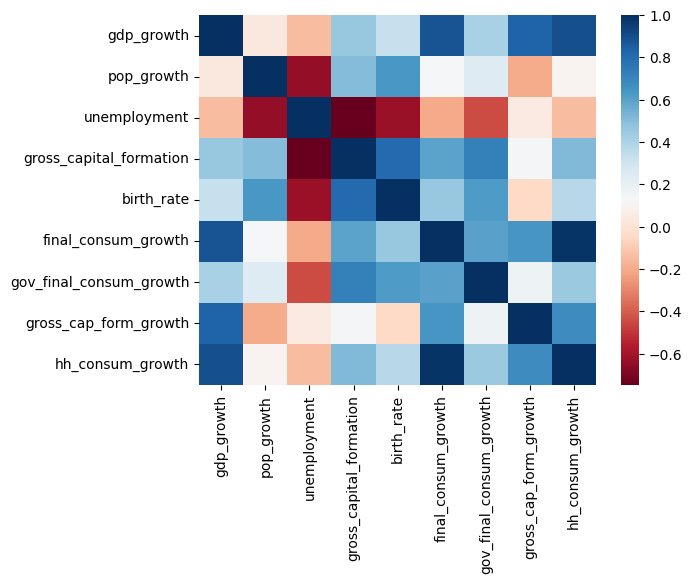

In [14]:
# calculate the correlation matrix
corr = econ_data.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [15]:
# define two data frames one before the drop and one after the drop
econ_data_before = econ_data
econ_data_after = econ_data.drop(['gdp_growth','birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(econ_data_before)
X2 = sm.tools.add_constant(econ_data_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                      640.507191
gdp_growth                  11.938521
pop_growth                   2.413511
unemployment                 3.820046
gross_capital_formation      7.069997
birth_rate                   4.614460
final_consum_growth        265.861927
gov_final_consum_growth     12.769716
gross_cap_form_growth        5.541235
hh_consum_growth           210.297564
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                      55.183326
pop_growth                  1.923558
unemployment                2.042052
gov_final_consum_growth     1.594311
gross_cap_form_growth       2.199646
hh_consum_growth            2.528512
dtype: float64

In [18]:
# get the summary
desc_data = econ_data.describe()

# display it
desc_data

,gdp_growth,pop_growth,unemployment,gross_capital_formation,birth_rate,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.695268,0.174128,9.196250,21.663822,10.082692,1.600077,1.432797,1.632438,1.671731
std,2.896204,0.320674,2.014719,2.756967,2.449067,2.397154,2.033778,7.678152,2.772305
min,-8.868221,-0.700011,5.380000,16.839729,6.400000,-7.982511,-3.182860,-17.684867,-10.411465
25%,0.710395,0.019484,7.636750,19.819593,9.175000,0.592807,0.072454,-1.004352,0.667256
50%,1.640846,0.071657,9.362500,21.724587,9.600000,1.401436,1.284497,2.555852,1.534954
75%,3.200434,0.429098,10.868750,23.040240,10.250000,3.099400,3.002660,5.054457,3.323870
max,8.931062,0.771291,12.683000,27.839574,16.800000,5.782513,5.503719,28.238983,6.759639


***
## Build the Model


In [19]:
# define our input variable (X) & output variable
econ_data_after = econ_data.drop(['birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)

X = econ_data_after.drop('gdp_growth', axis = 1)
Y = econ_data_after[['gdp_growth']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 0.9928
----------------------------------------------------------------------------------------------------
The Coefficient for pop_growth is 0.1
The Coefficient for unemployment is -0.093
The Coefficient for gov_final_consum_growth is 0.11
The Coefficient for gross_cap_form_growth is 0.19
The Coefficient for hh_consum_growth is 0.6


In [21]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[ 0.92454004],
       [ 9.00719815],
       [ 5.8407597 ],
       [ 1.96766005],
       [-4.68931102]])

***
## Evaluating the Model

In [22]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

### Test for heteroscedasticity

- The null hypothesis for the Breusch-Pagan test is that the variances for the errors are equal:
    - **H0 = σ2i = σ2**
- The alternate hypothesis is that the variances are not equal:
    - **H1 = σ2i ≠ σ2**

In [52]:
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("there is heterosecdasticity.")

0.18876459272752635 0.19716745332325003
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.1888
there is no heterosecdasticity.


## Checking for Autocorrelation

- **H0: The data are random.**
- **Ha: The data are not random.**

The number of lags will be 10
----------------------------------------------------------------------------------------------------
Durbin-Watson statistic: 1.52
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.07606
there is no autocorrelation.
----------------------------------------------------------------------------------------------------


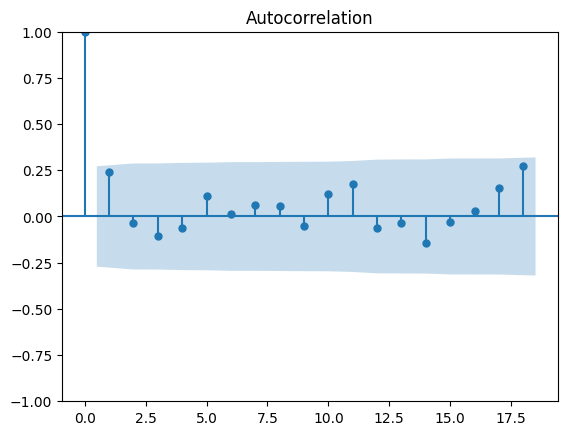

In [53]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox


# --- Optional: calculate the lag ---
lag = min(10, len(X)//5)
print('The number of lags will be {}'.format(lag))
print('-'*100)

# --- Durbin-Watson test for autocorrelation ---
dw_stat = durbin_watson(est.resid)
print("Durbin-Watson statistic: {:.4}".format(dw_stat))
print('-'*100)

# --- Ljung-Box test for no autocorrelation of residuals ---
# Use return_df=True to avoid type issues
test_results = acorr_ljungbox(est.resid, lags=lag, return_df=True)

# Extract p-values
p_values = test_results['lb_pvalue']

# Print results
lowest_p = p_values.min()
if lowest_p > 0.05:
    print("The lowest p-value found was {:.4}".format(lowest_p))
    print("there is no autocorrelation.")
else:
    print("The lowest p-value found was {:.4}".format(lowest_p))
    print("there is autocorrelation.")
print('-'*100)

# --- Plot autocorrelation ---
sm.graphics.tsa.plot_acf(est.resid)
plt.show()


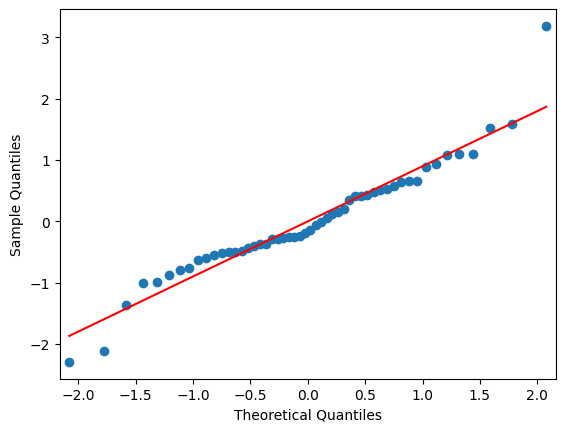

The mean of the residuals is 4.441e-16


In [29]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

### Measures of Error

- **Mean Absolute Error (MAE):** Is the mean of the absolute value of the errors. This gives an idea of magnitude but no sense of direction (too high or too low).

- **Mean Squared Error (MSE):** Is the mean of the squared errors. MSE is more popular than MAE because MSE "punishes" more significant errors.

- **Root Mean Squared Error (RMSE):** Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

In [30]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.15
MAE 0.922
RMSE 1.47


### R-Squared

In [31]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.69


In [32]:
# make some confidence intervals, 95% by default
est.conf_int()

,0,1
const,-1.094074,2.866518
pop_growth,-0.964740,1.363680
unemployment,-0.255012,0.126837
gov_final_consum_growth,-0.083944,0.250294
gross_cap_form_growth,0.119038,0.223028
hh_consum_growth,0.423032,0.731823


In [33]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     84.61
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           4.95e-22
Time:                        15:48:13   Log-Likelihood:                -68.203
No. Observations:                  52   AIC:                             148.4
Df Residuals:                      46   BIC:                             160.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Remove the Insignificant Variables.

In [38]:
# define our input variable (X) & output variable
econ_data_after = econ_data.drop(['birth_rate', 'final_consum_growth','gross_capital_formation',
                              'unemployment', 'pop_growth', 'gov_final_consum_growth'], axis = 1)

X = econ_data_after.drop('gdp_growth', axis = 1)
Y = econ_data_after[['gdp_growth']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [39]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     206.2
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.38e-24
Time:                        15:55:17   Log-Likelihood:                -70.275
No. Observations:                  52   AIC:                             146.5
Df Residuals:                      49   BIC:                             152.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

## Saving The Model For Future Use

In [47]:
import pickle

# pickle the model
with open('economic_multilinear_regression.sav','wb') as f:
     pickle.dump(regression_model, f)

# load it back in
with open('economic_multilinear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

In [48]:
# Predicted values
y_pred = model.predict(X_test_const)

# Errors (residuals)
errors = y_test.values.ravel() - y_pred.ravel()  # flatten if needed

/var/folders/_w/0pnm_dcj0fd49k2kldh3bc5h0000gn/T/ipykernel_5387/340952897.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  errors = y_test.values.ravel() - y_pred.ravel()  # flatten if needed


In [49]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
max_err = np.max(np.abs(errors))
median_err = np.median(np.abs(errors))

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"Median AE: {median_err:.3f}")
print(f"Max Error: {max_err:.3f}")
print(f"R²: {r2:.3f}")

MSE: 1.890
RMSE: 1.375
MAE: 0.921
Median AE: 0.558
Max Error: 3.444
R²: 0.729


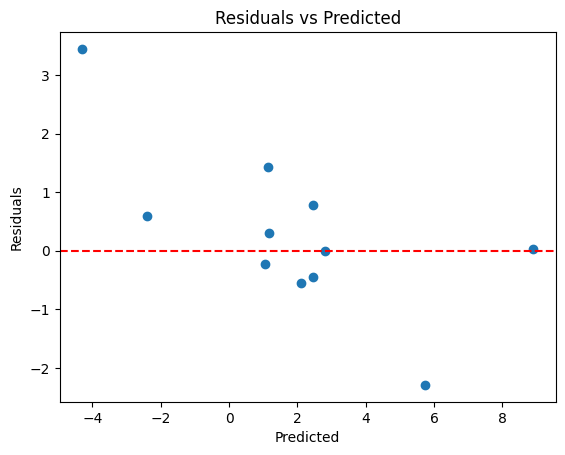

In [50]:
plt.scatter(y_pred, errors)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

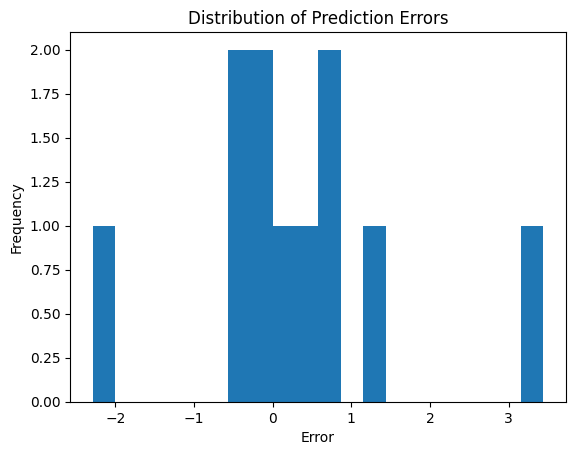

In [51]:
plt.hist(errors, bins=20)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()